1)	Data cleaning and preprocessing (at minimum have the following:  Removing unnecessary columns or data, Removing Twitter Handles( @user ), Removing punctuation, numbers, special characters, Removing stop words, Tokenization, and Stemming, TFIDF vectors, POS tagging, checking for missing values , train/test split of data).
2)	Deep Learning Model building, adding right combination of layers,  and successfully executing the model to make prediction. 


Importing the required libraries/packages 

In [1]:
!nvidia-smi

Wed Sep 23 04:47:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install gdown
!pip install tensorflow_text

In [3]:
!pip install wordcloud

In [4]:
!pip install tensorflow-gpu

In [5]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


I used the universal sentence encoder. This encodes the text into high dimensional vectors that can be used for text classification, smiliraty, clustering and etc.. 

In [6]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [7]:

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 50

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

using pandas to create the dataframe

The First portion is bassically from ICP 3. So, decided to keep that the same since it was an optition given by the instructor. All of the criteras met which are discussed in question one of icp4. 

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

looking at the data

In [9]:
df.size #return int number of elements in the object

95886

In [10]:
df.shape  #return a tuple representing the dimensionality of the DataFrame.

(31962, 3)

In [11]:
df.head(15) #looking at the first 10

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [12]:
df.drop('id', axis = 1, inplace = True)



In [13]:
df.head(15) #first 10

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


Converting to string(text only)

In [14]:
convert_to_str_txt = pd.Series(df.tweet.head(100)).to_string()
print(type(convert_to_str_txt))#it should print str type
print('\n')
print(convert_to_str_txt, '\n')
print("len of the text: ", len(convert_to_str_txt))

<class 'str'>


0      @user when a father is dysfunctional and is s...
1     @user @user thanks for #lyft credit i can't us...
2                                   bihday your majesty
3     #model   i love u take with u all the time in ...
4                factsguide: society now    #motivation
5     [2/2] huge fan fare and big talking before the...
6      @user camping tomorrow @user @user @user @use...
7     the next school year is the year for exams.ð...
8     we won!!! love the land!!! #allin #cavs #champ...
9      @user @user welcome here !  i'm   it's so #gr...
10     â #ireland consumer price index (mom) climb...
11    we are so selfish. #orlando #standwithorlando ...
12    i get to see my daddy today!!   #80days #getti...
13    @user #cnn calls #michigan middle school 'buil...
14    no comment!  in #australia   #opkillingbay #se...
15    ouch...junior is angryð#got7 #junior #yugyo...
16    i am thankful for having a paner. #thankful #p...
17                              

Now will tokenize the text 

In [15]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize


import nltk
nltk.download("popular")


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [16]:
tokenize_sent = sent_tokenize(convert_to_str_txt)

In [17]:
print("len of sentences: ", tokenize_sent, '\n')
tokenize_sent #printing the tokenzied data


len of sentences:  ["0      @user when a father is dysfunctional and is s...\n1     @user @user thanks for #lyft credit i can't us...\n2                                   bihday your majesty\n3     #model   i love u take with u all the time in ...\n4                factsguide: society now    #motivation\n5     [2/2] huge fan fare and big talking before the...\n6      @user camping tomorrow @user @user @user @use...\n7     the next school year is the year for exams.ð\x9f\x98...\n8     we won!!!", 'love the land!!!', '#allin #cavs #champ...\n9      @user @user welcome here !', "i'm   it's so #gr...\n10     â\x86\x9d #ireland consumer price index (mom) climb...\n11    we are so selfish.", '#orlando #standwithorlando ...\n12    i get to see my daddy today!!', "#80days #getti...\n13    @user #cnn calls #michigan middle school 'buil...\n14    no comment!", 'in #australia   #opkillingbay #se...\n15    ouch...junior is angryð\x9f\x98\x90#got7 #junior #yugyo...\n16    i am thankful for having a

["0      @user when a father is dysfunctional and is s...\n1     @user @user thanks for #lyft credit i can't us...\n2                                   bihday your majesty\n3     #model   i love u take with u all the time in ...\n4                factsguide: society now    #motivation\n5     [2/2] huge fan fare and big talking before the...\n6      @user camping tomorrow @user @user @user @use...\n7     the next school year is the year for exams.ð\x9f\x98...\n8     we won!!!",
 'love the land!!!',
 '#allin #cavs #champ...\n9      @user @user welcome here !',
 "i'm   it's so #gr...\n10     â\x86\x9d #ireland consumer price index (mom) climb...\n11    we are so selfish.",
 '#orlando #standwithorlando ...\n12    i get to see my daddy today!!',
 "#80days #getti...\n13    @user #cnn calls #michigan middle school 'buil...\n14    no comment!",
 'in #australia   #opkillingbay #se...\n15    ouch...junior is angryð\x9f\x98\x90#got7 #junior #yugyo...\n16    i am thankful for having a paner.',
 '#

Now first I will tokenze the words in the text. Will be passing in my variable convert_to_str_text. This is where the data text was converted into string


In [18]:
words_tokenize = word_tokenize(convert_to_str_txt)
print("word len: ", len(words_tokenize), '\n')
words_tokenize

word len:  1197 



['0',
 '@',
 'user',
 'when',
 'a',
 'father',
 'is',
 'dysfunctional',
 'and',
 'is',
 's',
 '...',
 '1',
 '@',
 'user',
 '@',
 'user',
 'thanks',
 'for',
 '#',
 'lyft',
 'credit',
 'i',
 'ca',
 "n't",
 'us',
 '...',
 '2',
 'bihday',
 'your',
 'majesty',
 '3',
 '#',
 'model',
 'i',
 'love',
 'u',
 'take',
 'with',
 'u',
 'all',
 'the',
 'time',
 'in',
 '...',
 '4',
 'factsguide',
 ':',
 'society',
 'now',
 '#',
 'motivation',
 '5',
 '[',
 '2/2',
 ']',
 'huge',
 'fan',
 'fare',
 'and',
 'big',
 'talking',
 'before',
 'the',
 '...',
 '6',
 '@',
 'user',
 'camping',
 'tomorrow',
 '@',
 'user',
 '@',
 'user',
 '@',
 'user',
 '@',
 'use',
 '...',
 '7',
 'the',
 'next',
 'school',
 'year',
 'is',
 'the',
 'year',
 'for',
 'exams.ð\x9f\x98',
 '...',
 '8',
 'we',
 'won',
 '!',
 '!',
 '!',
 'love',
 'the',
 'land',
 '!',
 '!',
 '!',
 '#',
 'allin',
 '#',
 'cavs',
 '#',
 'champ',
 '...',
 '9',
 '@',
 'user',
 '@',
 'user',
 'welcome',
 'here',
 '!',
 'i',
 "'m",
 'it',
 "'s",
 'so',
 '#',
 'gr'

Cleaning the data and removing any special character, puncatuions, etc. 

In [19]:
remove_punc = [] #emptylist to store words
#using for loop to check and append to clean_words list
for i in words_tokenize:
  if i.isalpha():
    remove_punc.append(i.lower()) #lower will convert all the words to lower case
print(remove_punc)
print('\n')
print("len of the clean words: ", len(remove_punc))

['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 's', 'user', 'user', 'thanks', 'for', 'lyft', 'credit', 'i', 'ca', 'us', 'bihday', 'your', 'majesty', 'model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'factsguide', 'society', 'now', 'motivation', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'the', 'user', 'camping', 'tomorrow', 'user', 'user', 'user', 'use', 'the', 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'we', 'won', 'love', 'the', 'land', 'allin', 'cavs', 'champ', 'user', 'user', 'welcome', 'here', 'i', 'it', 'so', 'gr', 'ireland', 'consumer', 'price', 'index', 'mom', 'climb', 'we', 'are', 'so', 'selfish', 'orlando', 'standwithorlando', 'i', 'get', 'to', 'see', 'my', 'daddy', 'today', 'getti', 'user', 'cnn', 'calls', 'michigan', 'middle', 'school', 'no', 'comment', 'in', 'australia', 'opkillingbay', 'se', 'ouch', 'junior', 'is', 'junior', 'yugyo', 'i', 'am', 'thankful', 'for', 'having', 'a', 'paner', 'thankful', '

looking at all the stopwords in the english language and then removing the stopwords

In [20]:
from nltk.corpus import stopwords
english_stopwords = stopwords.words("english")
print(english_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
filitered_words = [] #this empty list will be used to store the clean words
#using for loop to check for stopwords and non stopwords
for j in remove_punc:
  if j not in english_stopwords:
    filitered_words.append(j) #the non stopwords are appened to the list
print(filitered_words, '\n')
print("words len: ", len(filitered_words))

['user', 'father', 'dysfunctional', 'user', 'user', 'thanks', 'lyft', 'credit', 'ca', 'us', 'bihday', 'majesty', 'model', 'love', 'u', 'take', 'u', 'time', 'factsguide', 'society', 'motivation', 'huge', 'fan', 'fare', 'big', 'talking', 'user', 'camping', 'tomorrow', 'user', 'user', 'user', 'use', 'next', 'school', 'year', 'year', 'love', 'land', 'allin', 'cavs', 'champ', 'user', 'user', 'welcome', 'gr', 'ireland', 'consumer', 'price', 'index', 'mom', 'climb', 'selfish', 'orlando', 'standwithorlando', 'get', 'see', 'daddy', 'today', 'getti', 'user', 'cnn', 'calls', 'michigan', 'middle', 'school', 'comment', 'australia', 'opkillingbay', 'se', 'ouch', 'junior', 'junior', 'yugyo', 'thankful', 'paner', 'thankful', 'p', 'retweet', 'agree', 'friday', 'smiles', 'around', 'via', 'ig', 'use', 'know', 'essential', 'oils', 'made', 'people', 'blaming', 'ha', 'conceded', 'goal', 'sad', 'little', 'badday', 'coneofshame', 'cats', 'product', 'day', 'happy', 'man', 'wine', 'tool', 'user', 'user', 'lumpy

Now applying lemitization to the data. Using this over stemming becuase I have seen better results with it. 

In [22]:
from nltk import WordNetLemmatizer #importing the required packages 
word_lemma = WordNetLemmatizer()
list_of_words = filitered_words #passing in the filiteres 
#using for loop it iterate through the word
for k in list_of_words:
  print(word_lemma.lemmatize(k, pos="v"))

user
father
dysfunctional
user
user
thank
lyft
credit
ca
us
bihday
majesty
model
love
u
take
u
time
factsguide
society
motivation
huge
fan
fare
big
talk
user
camp
tomorrow
user
user
user
use
next
school
year
year
love
land
allin
cavs
champ
user
user
welcome
gr
ireland
consumer
price
index
mom
climb
selfish
orlando
standwithorlando
get
see
daddy
today
getti
user
cnn
call
michigan
middle
school
comment
australia
opkillingbay
se
ouch
junior
junior
yugyo
thankful
paner
thankful
p
retweet
agree
friday
smile
around
via
ig
use
know
essential
oil
make
people
blame
ha
concede
goal
sad
little
badday
coneofshame
cat
product
day
happy
man
wine
tool
user
user
lumpy
say
prove
lumpy
user
tgif
ff
gamedev
indiedev
beautiful
sign
vendor
upsi
user
smile
media
great
panel
mediatization
happy
father
day
user
people
go
nightclub
good
nig
never
chance
vote
presid
alohafriday
time
exist
positiv
user
rip
fellow
nohern
ireland
fan
wh
hard
monday
due
cloudy
weather
di
unbelievable
century
bull
dominate
traveling

Now POS tagging to get the nouns, verbs, etc.
will be using the filitered_words to pass into pos tagging

In [23]:
#using for loop to iterate over the words that have already been tokenized 

for z in words_tokenize:
  pos_tagging = nltk.pos_tag(words_tokenize)

pos_tagging

[('0', 'CD'),
 ('@', 'NNS'),
 ('user', 'RB'),
 ('when', 'WRB'),
 ('a', 'DT'),
 ('father', 'NN'),
 ('is', 'VBZ'),
 ('dysfunctional', 'JJ'),
 ('and', 'CC'),
 ('is', 'VBZ'),
 ('s', 'JJ'),
 ('...', ':'),
 ('1', 'CD'),
 ('@', 'NNP'),
 ('user', 'NN'),
 ('@', 'NNP'),
 ('user', 'NN'),
 ('thanks', 'NNS'),
 ('for', 'IN'),
 ('#', '#'),
 ('lyft', 'JJ'),
 ('credit', 'NN'),
 ('i', 'NN'),
 ('ca', 'MD'),
 ("n't", 'RB'),
 ('us', 'PRP'),
 ('...', ':'),
 ('2', 'CD'),
 ('bihday', 'IN'),
 ('your', 'PRP$'),
 ('majesty', 'JJ'),
 ('3', 'CD'),
 ('#', '#'),
 ('model', 'NN'),
 ('i', 'NN'),
 ('love', 'VBP'),
 ('u', 'JJ'),
 ('take', 'NN'),
 ('with', 'IN'),
 ('u', 'JJ'),
 ('all', 'PDT'),
 ('the', 'DT'),
 ('time', 'NN'),
 ('in', 'IN'),
 ('...', ':'),
 ('4', 'CD'),
 ('factsguide', 'NN'),
 (':', ':'),
 ('society', 'NN'),
 ('now', 'RB'),
 ('#', '#'),
 ('motivation', 'NN'),
 ('5', 'CD'),
 ('[', 'NN'),
 ('2/2', 'CD'),
 (']', 'JJ'),
 ('huge', 'JJ'),
 ('fan', 'NN'),
 ('fare', 'NN'),
 ('and', 'CC'),
 ('big', 'JJ'),
 ('talki

TFIDF vectors

In [24]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#sentences = tokenize_sent[0:1] 

#vectorizer = TfidfVectorizer(norm = None) #Create an object :


#X = vectorizer.fit_transform(sentences).toarray() #Generating output for TF_IDF :

#Total words with their index in model :
#print(vectorizer.vocabulary_)
#print("\n")

#Features :
#print(vectorizer.get_feature_names())
#print("\n")

#Show the output :
#print(X)

checking for null values

In [25]:
df.isnull() #checking to see if there are any missing values.

,label,tweet
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
31957,False,False
31958,False,False
31959,False,False
31960,False,False


In [26]:
df.isnull().sum() #this checks the number of missing values in each column. Converts trues to 1s and 0s false.

label    0
tweet    0
dtype: int64

test/train. Cleaning the data first because this the best mehtod I found that works best for me

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

import preprocess_kgptalkie as ps
import re

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-5af9o4hh
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-5af9o4hh
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.0-cp36-none-any.whl size=11716 sha256=5ae9b8ebe9412bb7e0f4673e54698f656c52e54eb46c241dbeb02cfee818aa7c
  Stored in directory: /tmp/pip-ephem-wheel-cache-qw5cggbj/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [28]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [29]:
df['tweet'] = df['tweet'].apply(lambda x: get_clean(x))

In [30]:
df.head(15)


,label,tweet
0,0,youser when a father is dysfyounctional and is...
1,0,youser youser thanks for lyfeatyouring credit ...
2,0,bihday yoyour majesty
3,0,model i love you take with you all the time in...
4,0,factsgyouide soriginal contentthat isty now mo...
5,0,22 hyouge fan fare and big talking before they...
6,0,youser camping tomorrow youser youser youser y...
7,0,the next school year is the year for examiss c...
8,0,we won love the land allin cavs champions clev...
9,0,youser youser welcome here i am it is so great


In [31]:

tfidf = TfidfVectorizer(max_features=2000,ngram_range=(1,3), analyzer='char')

X = tfidf.fit_transform(df['tweet'])
y = df['label']
print(X.shape)
print('\n')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('\n')
print(classification_report(y_test, y_pred))

(31962, 2000)




              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5985
           1       0.81      0.48      0.60       408

    accuracy                           0.96      6393
   macro avg       0.89      0.74      0.79      6393
weighted avg       0.96      0.96      0.95      6393



Deep learning model building begins here 

In [32]:
from wordcloud import WordCloud, ImageColorGenerator
import requests

In [33]:
df['tweet_label'] = df['label']

df['tweet_text'] = df['label'].apply(
  lambda x: "not_racist_sexit" if x < 1 else "racist_sexit"
)

In [84]:
df = df[[ 'tweet_text']]

In [83]:
df.tweet_text.value_counts()

not_racist_sexit    29720
racist_sexit         2242
Name: tweet_text, dtype: int64

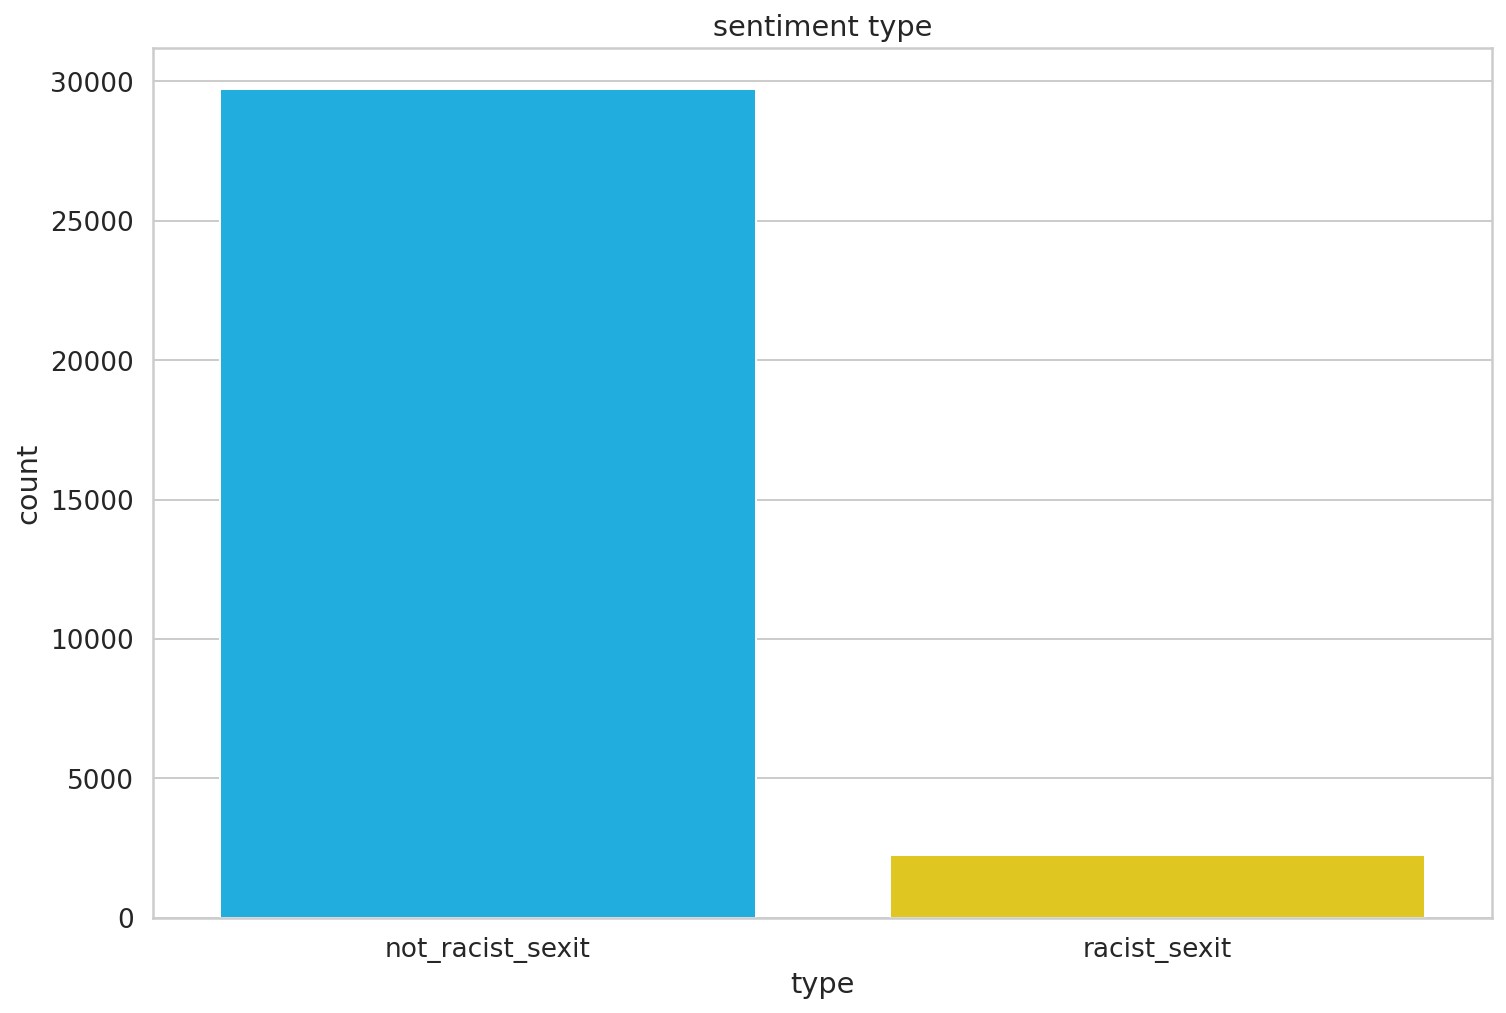

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(
  x='tweet_text',
  data=df,
  order=df.tweet_text.value_counts().index
)

plt.xlabel("type")
plt.title("sentiment type");

In [77]:
racist_sexit_sentiment = df[df.tweet_text == "racist_sexit"] 
not_racist_sexit_sentiment = df[df.tweet_text =="not_racist_sexit"] 

In [85]:
print(racist_sexit_sentiment.shape, not_racist_sexit_sentiment.shape)

(2242, 1) (29720, 1)


In [92]:
good_df = not_racist_sexit_sentiment.sample(n=len(racist_sexit_sentiment), random_state=RANDOM_SEED,replace=True)
bad_df = racist_sexit_sentiment

In [87]:
review_df = good_df.append(bad_df).reset_index(drop=True)
review_df.shape

(4484, 1)

In [88]:
review_df.head(20)

,tweet_text
0,not_racist_sexit
1,not_racist_sexit
2,not_racist_sexit
3,not_racist_sexit
4,not_racist_sexit
5,not_racist_sexit
6,not_racist_sexit
7,not_racist_sexit
8,not_racist_sexit
9,not_racist_sexit


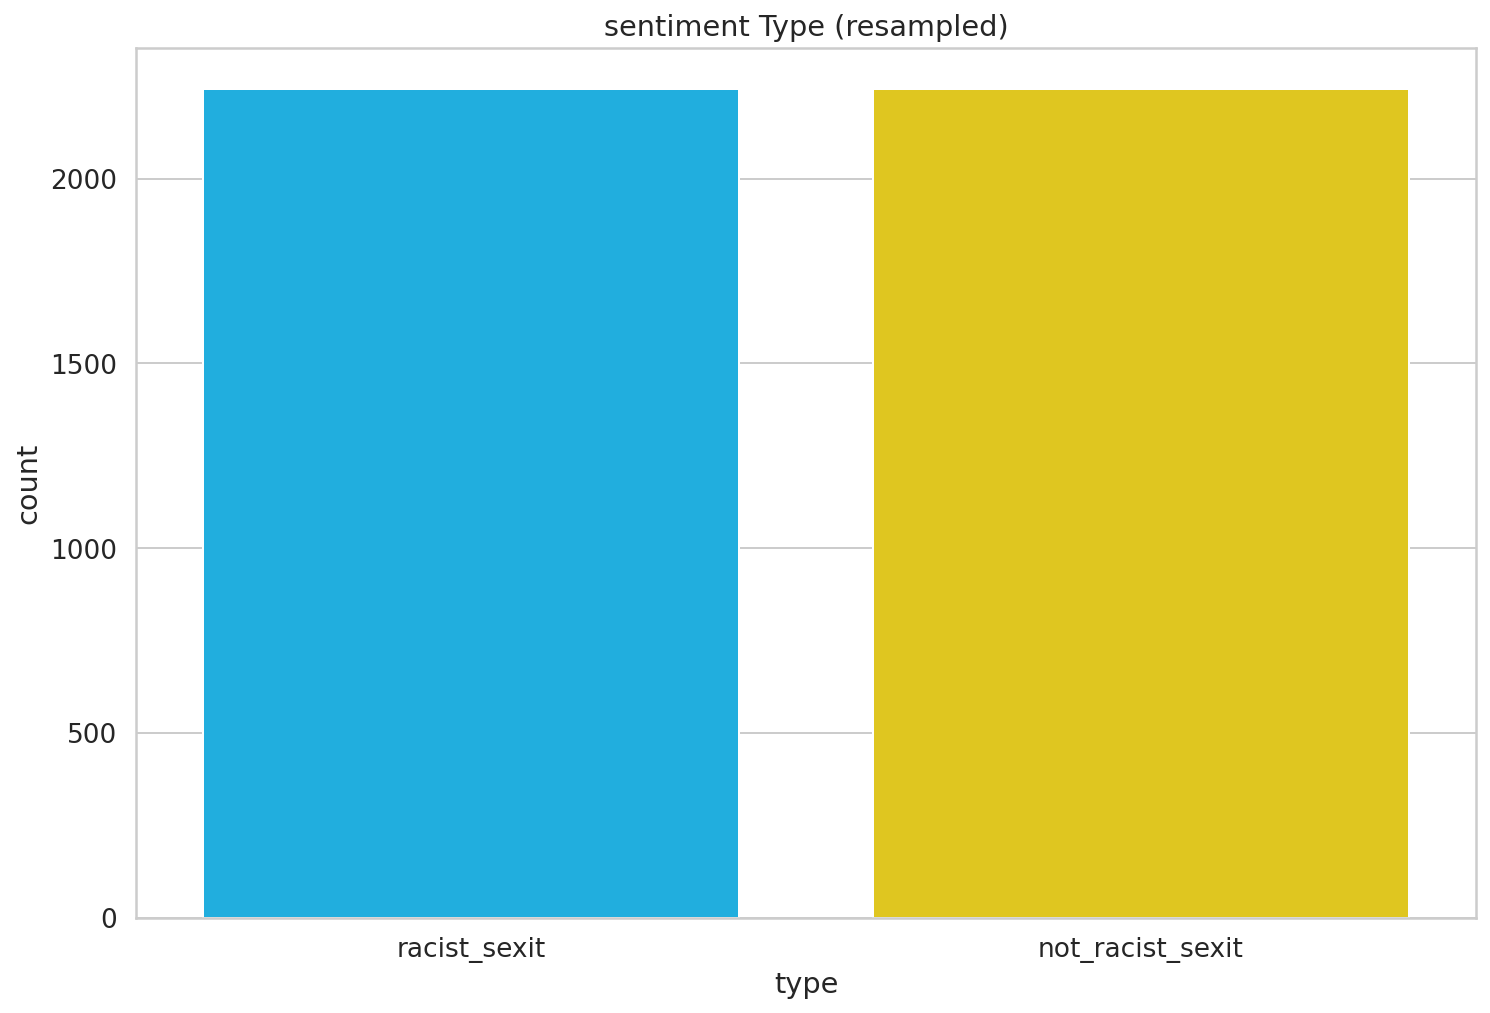

In [89]:
sns.countplot(
  x='tweet_text',
  data=review_df,
  order=review_df.tweet_text.value_counts().index
)

plt.xlabel("type")
plt.title("sentiment Type (resampled)");

In [51]:
from sklearn.preprocessing import OneHotEncoder

type_one_hot = OneHotEncoder(sparse=False).fit_transform(
  review_df.tweet_text.to_numpy().reshape(-1, 1)
)

In [53]:
train_reviews, test_reviews, y_train, y_test =\
  train_test_split(
    review_df.tweet_text, 
    type_one_hot, 
    test_size=.1, 
    random_state=RANDOM_SEED
  )

In [54]:
X_train = []
for r in tqdm(train_reviews):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(review_emb)

X_train = np.array(X_train)

100%|██████████| 4035/4035 [00:52<00:00, 77.20it/s]


In [55]:
X_test = []
for r in tqdm(test_reviews):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(review_emb)

X_test = np.array(X_test)

100%|██████████| 449/449 [00:05<00:00, 80.43it/s]


In [56]:
print(X_train.shape)

(4035, 512)


In [57]:
print(X_test.shape)

(449, 512)


In [58]:
print(y_train.shape)

(4035, 2)


The analysis portion using keras

In [59]:
model = keras.Sequential()

In [ ]:
model.add(
    keras.layers.Dense(
        units=255,
        input_shape=(X_train.shape[1],),
        activation='relu'
    )
)

In [60]:
model.add(keras.layers.Dropout(rate=0.5))

In [61]:
model.add(
    keras.layers.Dense(
        units=250,
        activation='relu'
    )
)

In [62]:
model.add(keras.layers.Dropout(rate=0.5))

In [63]:
model.add(keras.layers.Dense(2, activation='softmax'))

In [64]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

In [65]:
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=True
)

Epoch 1/10
227/227 [==============================] - 1s 3ms/step - loss: 0.0939 - accuracy: 0.9796 - val_loss: 9.9406e-04 - val_accuracy: 1.0000
Epoch 2/10
227/227 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.5664e-04 - val_accuracy: 1.0000
Epoch 3/10
227/227 [==============================] - 1s 2ms/step - loss: 4.4161e-04 - accuracy: 1.0000 - val_loss: 5.3391e-05 - val_accuracy: 1.0000
Epoch 4/10
227/227 [==============================] - 1s 2ms/step - loss: 2.2869e-04 - accuracy: 1.0000 - val_loss: 2.4102e-05 - val_accuracy: 1.0000
Epoch 5/10
227/227 [==============================] - 1s 2ms/step - loss: 1.4737e-04 - accuracy: 1.0000 - val_loss: 1.2945e-05 - val_accuracy: 1.0000
Epoch 6/10
227/227 [==============================] - 1s 2ms/step - loss: 1.0401e-04 - accuracy: 1.0000 - val_loss: 7.3909e-06 - val_accuracy: 1.0000
Epoch 7/10
227/227 [==============================] - 1s 2ms/step - loss: 8.0803e-05 - accuracy: 1.0000 - va

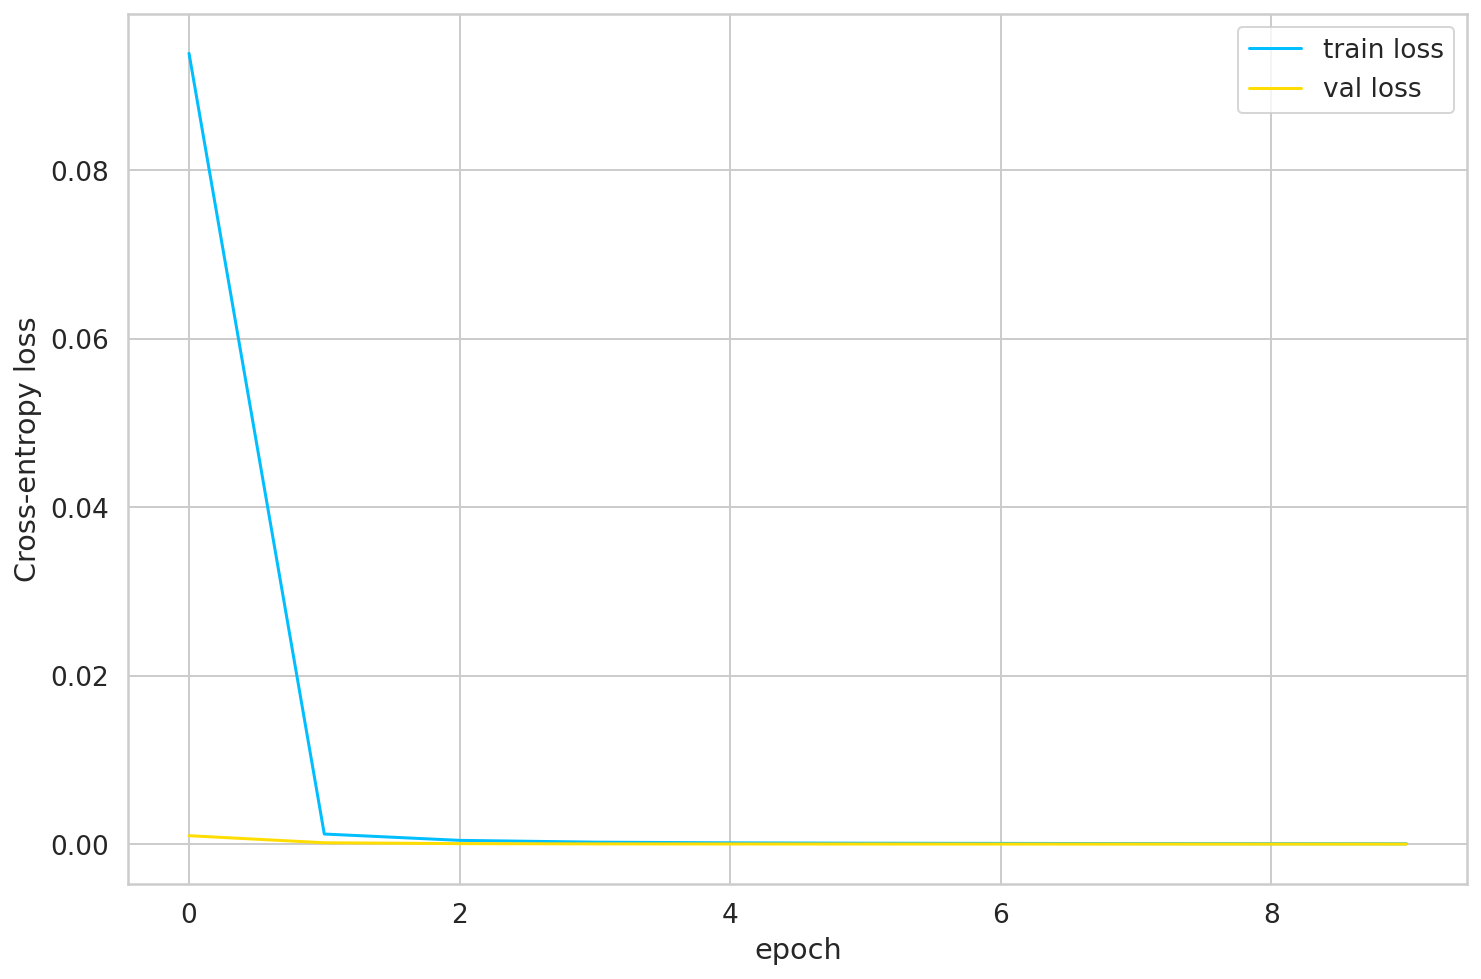

In [66]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

In [67]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 2ms/step - loss: 1.6079e-06 - accuracy: 1.0000


[1.6078635098892846e-06, 1.0]

Checking to see the accuracy of the predition 

In [93]:
print(test_reviews.iloc[0])
print("good" if y_test[0][0] == 1 else "bad")

not_racist_sexit
good


In [94]:
y_pred = model.predict(X_test[:1])
print(y_pred)
"good" if np.argmax(y_pred) == 0 else "bad"

[[9.9999833e-01 1.6169323e-06]]


'good'